In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter('ignore')
plt.style.use('dark_background')
from sklearn.metrics import mean_squared_error as mse

In [2]:
data = pd.read_csv('transformed_housing_data2')
data

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,...,0,0,0,1,0,0,0,0,0,0
21605,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,...,0,1,0,0,0,0,0,0,0,0
21606,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,...,0,0,0,1,0,0,0,0,0,0
21607,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale_Price']
X = scaler.fit_transform(data.drop(columns = ['Sale_Price']))
X = pd.DataFrame(data = X, columns = data.drop(columns = ['Sale_Price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.210155,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,4.758385,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.210155,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.210155,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.210155,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [4]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(X, Y, test_size = 0.3, random_state = 101)

x_test.shape, x_train.shape, y_test.shape, y_train.shape

((6483, 30), (15126, 30), (6483,), (15126,))

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)

LinearRegression(normalize=True)

In [6]:
def adj_r2(m, data_y, predictions):
    from sklearn.metrics import r2_score
    R = r2_score(data_y, predictions)
    n = len(data_y)
    adj_R = 1 - ((n -1)/(n - m - 1)) * (1 - R)
    return adj_R

In [7]:
def return_r2(X, Y, model):
    '''
    X = independent variable
    Y = Independent variable / target
    model = predictive model
    
    returns the adjusted R2
    '''
    model.fit(X, Y)
    pred = model.predict(X)
    m = len(X.columns)
    return adj_r2(m, Y, pred)

In [8]:
def backward_elimination(model, X, Y, min_features):
    '''
    X = independent variable
    Y = Independent variable / target
    model = predictive model
    min_features = elimineates the worst features from the model
    
    returns
    base_r2 = adjusted r2 of the final model
    r2_history = list of base_r2 for every independent variable eliminated to the variable
    elim_data = best features upto max features
    '''
    elim_data = X[:] 
    r2_history = []
    base_r2 = return_r2(elim_data, Y, model)
    print('Base R2 is ', base_r2)
    for i in range(X.shape[1] - min_features):
        diff = -100
        for var in elim_data.columns:
            tmp = elim_data.drop(columns = [var])
            r2 = return_r2(tmp, Y, model)
            
            if (r2 - base_r2) > diff:
                diff = r2 - base_r2
                elim = var
                new_r2 = r2
        elim_data.drop(columns = [elim], inplace = True)
        print(elim, 'Eliminated : New adj_R2 = ', new_r2)
        r2_history.append(new_r2)
        base_r2 = new_r2
    return base_r2, r2_history, elim_data

In [10]:
score, history, survived_data = backward_elimination(lr, x_train, y_train, 1)

Base R2 is  0.8411713183817104
Area of the House from Basement (in Sqft) Eliminated : New adj_R2 =  0.8411797446658431
Condition_of_the_House_Okay Eliminated : New adj_R2 =  0.8411623663620638
No of Floors Eliminated : New adj_R2 =  0.8411171250786783
Lot Area after Renovation (in Sqft) Eliminated : New adj_R2 =  0.8410610037918913
No of Bedrooms Eliminated : New adj_R2 =  0.8409159992800564
Condition_of_the_House_Fair Eliminated : New adj_R2 =  0.8407704362899258
Condition_of_the_House_Good Eliminated : New adj_R2 =  0.8404605503169833
Year since Renovation Eliminated : New adj_R2 =  0.8399491254999183
Ever_Renovated_Yes Eliminated : New adj_R2 =  0.8394089149738739
No of Bathrooms Eliminated : New adj_R2 =  0.8384257980145959
Living Area after Renovation (in Sqft) Eliminated : New adj_R2 =  0.8371253089016231
Waterfront_View_Yes Eliminated : New adj_R2 =  0.8356698063157928
Zipcode_Group_Zipcode_Group_1 Eliminated : New adj_R2 =  0.8339600690154836
Lot Area (in Sqft) Eliminated : New

In [11]:
history

[0.8411797446658431,
 0.8411623663620638,
 0.8411171250786783,
 0.8410610037918913,
 0.8409159992800564,
 0.8407704362899258,
 0.8404605503169833,
 0.8399491254999183,
 0.8394089149738739,
 0.8384257980145959,
 0.8371253089016231,
 0.8356698063157928,
 0.8339600690154836,
 0.8318506623682476,
 0.8295620645811876,
 0.8266049066242156,
 0.8242921707826699,
 0.8192910381878411,
 0.8135013723628121,
 0.7999680310309634,
 0.7819399099884953,
 0.7703021607702248,
 0.7580319410320748,
 0.745451210409211,
 0.7245993616828927,
 0.7001983572378965,
 0.6693250844517911,
 0.6158682713046579,
 0.4825106645259518]

Text(0.5, 1.0, 'Backward Elimination')

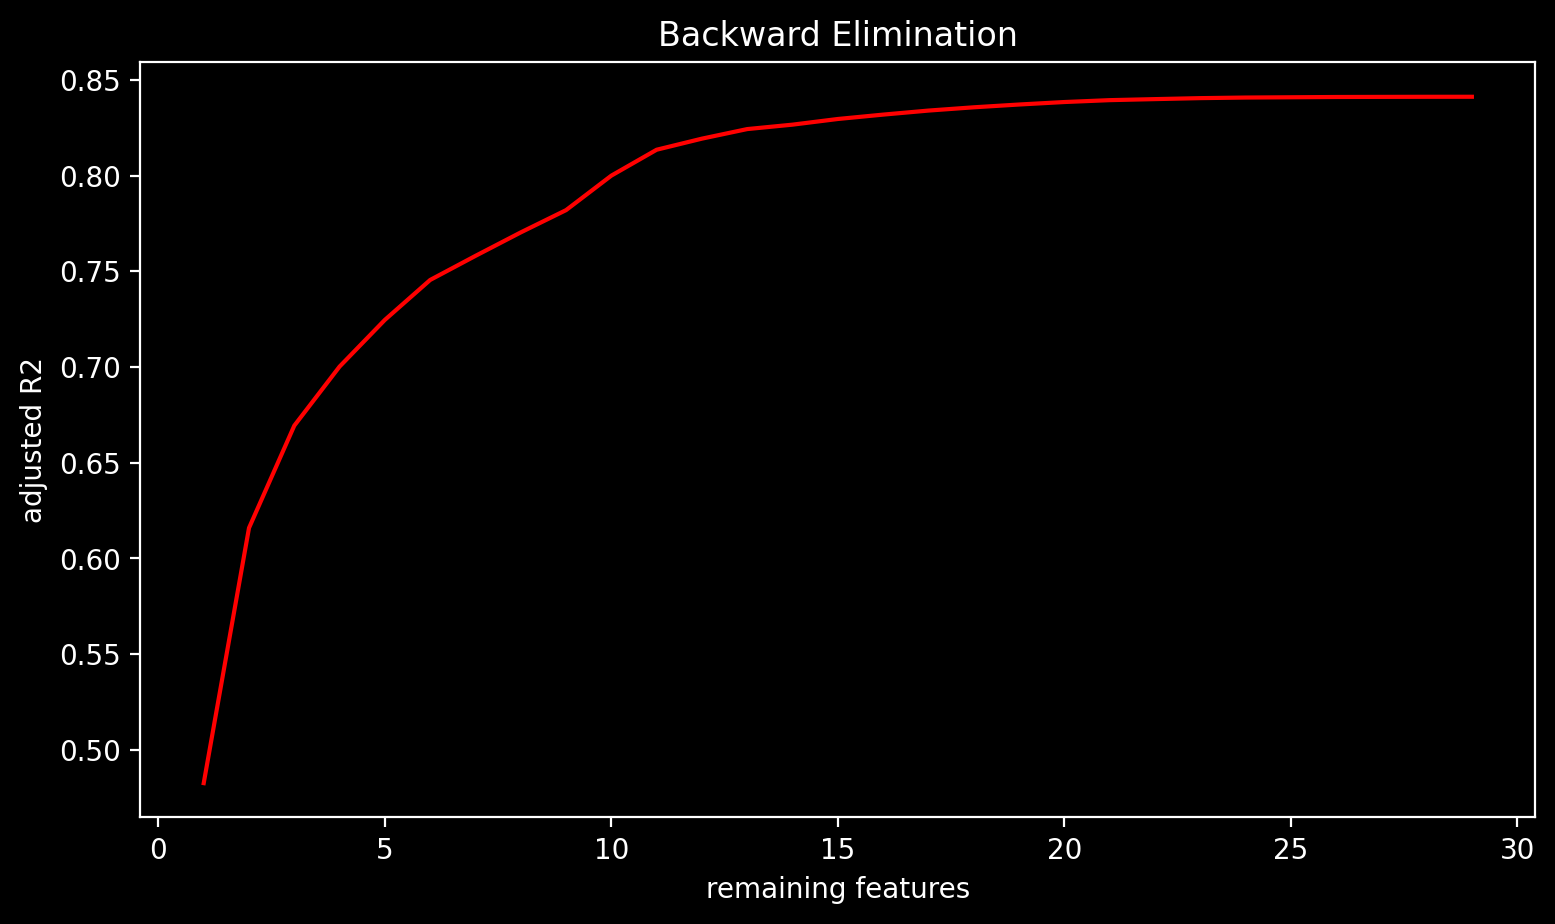

In [13]:
plt.figure(dpi = 200, figsize = (9,5))
plt.plot(range(len(history), 0, -1), history, color = 'red')
plt.xlabel('remaining features')
plt.ylabel('adjusted R2')
plt.title('Backward Elimination')